In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 200
L = 100
N = 100
lam = 0.01
Q = np.zeros(N)
h = L / (N - 1)
tau = h / (20 * lam)
M = round(T / tau)

In [3]:
def q_init(x):
    if x < L / 3 or x > 2 * L / 3:
        return 0
    else:
        return 1

In [4]:
def q_bound(t):
    return 0

In [5]:
for i in range(N):
    x_i = h * i
    x_star = x_i - lam * T
    if x_star > 0:
        Q[i] = q_init(x_star)
    else:
        t = T - x_i / lam
        Q[i] = q_bound(t)

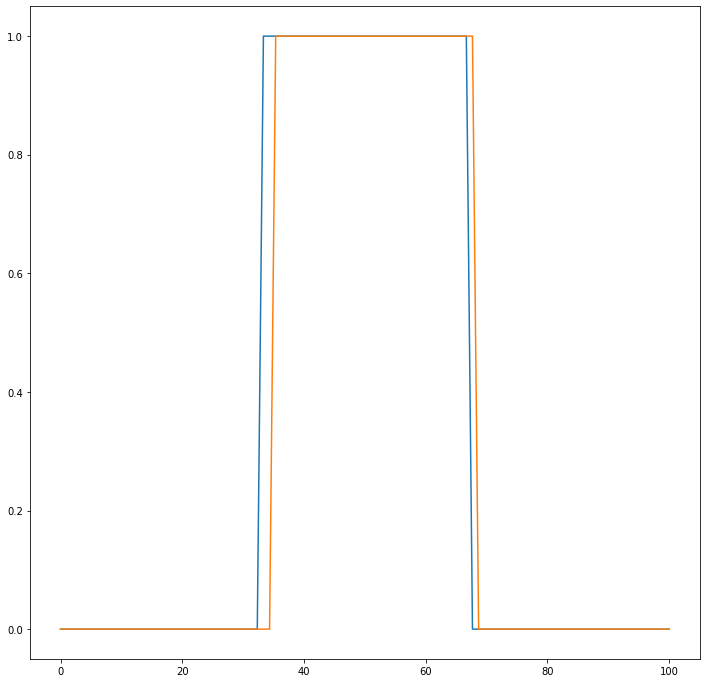

In [6]:
x = np.linspace(0, L, N)
y_0 = np.zeros_like(x)
plt.figure(figsize=(12,12))
for i, e in enumerate(x):
    y_0[i] = q_init(e)
plt.plot(x, y_0)
plt.plot(x, Q)

In [7]:
t = 0
for i in range(N):
    x_i = h * i
    Q[i] = q_init(x_i)
Q_new = np.zeros_like(Q)
for j in range(M):
    for i in range (N):
        x_i = h * i
        x_star = x_i - lam * tau
        if x_star >= 0:
            a = (Q[i] - Q[i - 1]) / h
            b = Q[i] - a * x_i
            Q_new[i] = a * x_star + b
        else:
            Q_new[i] = q_bound(0)
    Q = Q_new

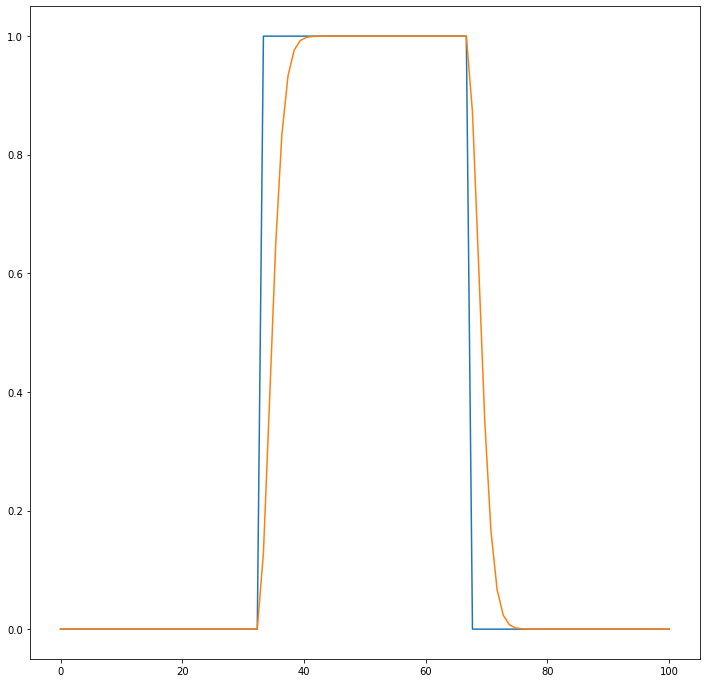

In [8]:
x = np.linspace(0, L, N)
y_0 = np.zeros_like(x)
plt.figure(figsize=(12,12))
for i, e in enumerate(x):
    y_0[i] = q_init(e)
plt.plot(x, y_0)
plt.plot(x, Q)

In [9]:
T = 200
L = 100
N = 20
lam = 0.01
Q = np.zeros(N)
h = L / (N -1)
tau = 0.7 * h / lam
M = round(T / tau)
for i in range(N):
    x_i = h * i
    Q[i] = q_init(x_i)
Q_new = np.zeros_like(Q)
for j in range(M):
    Q_new[0] = q_bound(0)
    for i in range (1, N):
        Q_new[i] = Q[i] - lam * tau * (Q[i] - Q[i - 1]) / h
    Q = Q_new


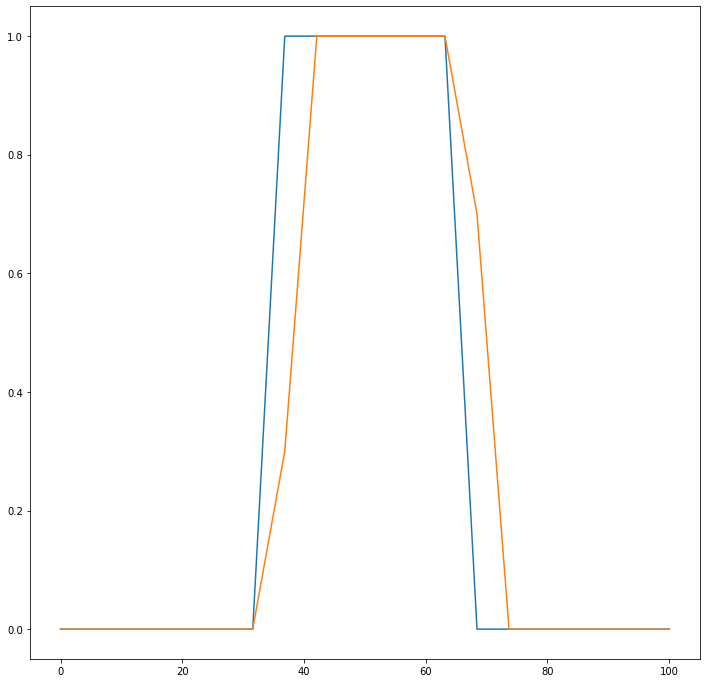

In [10]:
x = np.linspace(0, L, N)
y_0 = np.zeros_like(x)
plt.figure(figsize=(12,12))
for i, e in enumerate(x):
    y_0[i] = q_init(e)
plt.plot(x, y_0)
plt.plot(x, Q)

In [11]:
L = 100
N = 200
lam = 0.1
T = L / lam
h = L / (N -1)
tau = 0.7 * h / lam
M = round(T / tau)
Q = np.zeros(N)
for i in range(N):
    x_i = h * i
    Q[i] = q_init(x_i)
Q_new = np.zeros_like(Q)
for j in range(M):
    Q_new[0] = Q[0] - lam * tau * (Q[0] - Q[N - 1]) / h
    for i in range (1, N):
        Q_new[i] = Q[i] - lam * tau * (Q[i] - Q[i - 1]) / h
    Q = Q_new

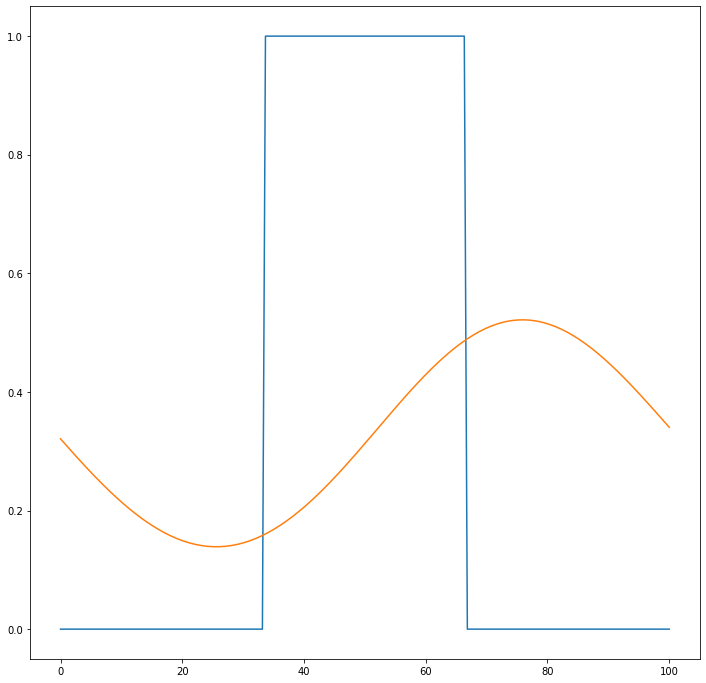

In [12]:
x = np.linspace(0, L, N)
y_0 = np.zeros_like(x)
plt.figure(figsize=(12,12))
for i, e in enumerate(x):
    y_0[i] = q_init(e)
plt.plot(x, y_0)
plt.plot(x, Q)